In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data = pd.read_csv(r'dataset\\train.csv')
test_data = pd.read_csv(r'dataset\\test.csv')

print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [8]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [12]:
for i in categorical_columns:
    print(train_data[i].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng

In [14]:
encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = encoder.fit_transform(train_data[col].astype(str))
train_data.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
1455         3            3          0  ...         0       3      4   
1456         3            3          0  ...         0       3      2   
1457         3            3          0  ...         0       3      0   
1458         3            3          0  ...         0       3      4   
1459         3            3          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1455            4        0       8    2007         8              4     175000  
1456            4        0       2    2010         8              4     210000  
1457            2     2500       5    2010         8              4     266500  
1458            4        0       4    2010         8              4     142125  
1459            4        0       6    2008         8              4     147500  

[5 rows x 81 columns]

In [21]:
train_y = train_data['SalePrice']
train_x = train_data.drop('SalePrice',axis=1)
train_x.shape
train_y.shape

(1460,)

In [23]:
numerical_columns = train_x.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [24]:
scaler = StandardScaler()
train_x[numerical_columns] = scaler.fit_transform(train_x[numerical_columns])
train_x.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0 -1.730865    0.073375         3    -0.208034 -0.207142       1      2   
1 -1.728492   -0.872563         3     0.409895 -0.091886       1      2   
2 -1.726120    0.073375         3    -0.084449  0.073480       1      2   
3 -1.723747    0.309859         3    -0.414011 -0.096897       1      2   
4 -1.721374    0.073375         3     0.574676  0.375148       1      2   

   LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0         3            3          0  ...    -0.270208 -0.068692       3   
1         3            3          0  ...    -0.270208 -0.068692       3   
2         0            3          0  ...    -0.270208 -0.068692       3   
3         0            3          0  ...    -0.270208 -0.068692       3   
4         0            3          0  ...    -0.270208 -0.068692       3   

   Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition  
0      4            4 -0.087688 -1.599111  0.138777         8              4  
1      4            4 -0.087688 -0.489110 -0.614439         8              4  
2      4            4 -0.087688  0.990891  0.138777         8              4  
3      4            4 -0.087688 -1.599111 -1.367655         8              0  
4      4            4 -0.087688  2.100892  0.138777         8              4  

[5 rows x 80 columns]

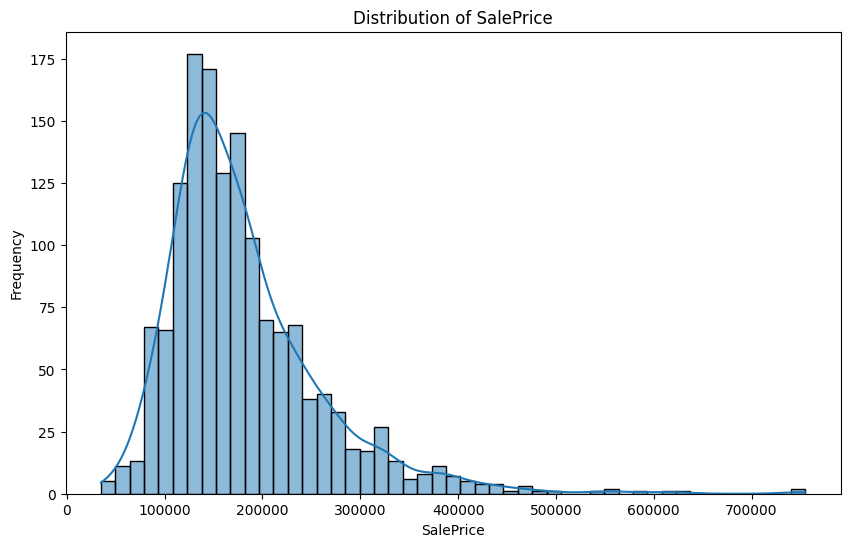

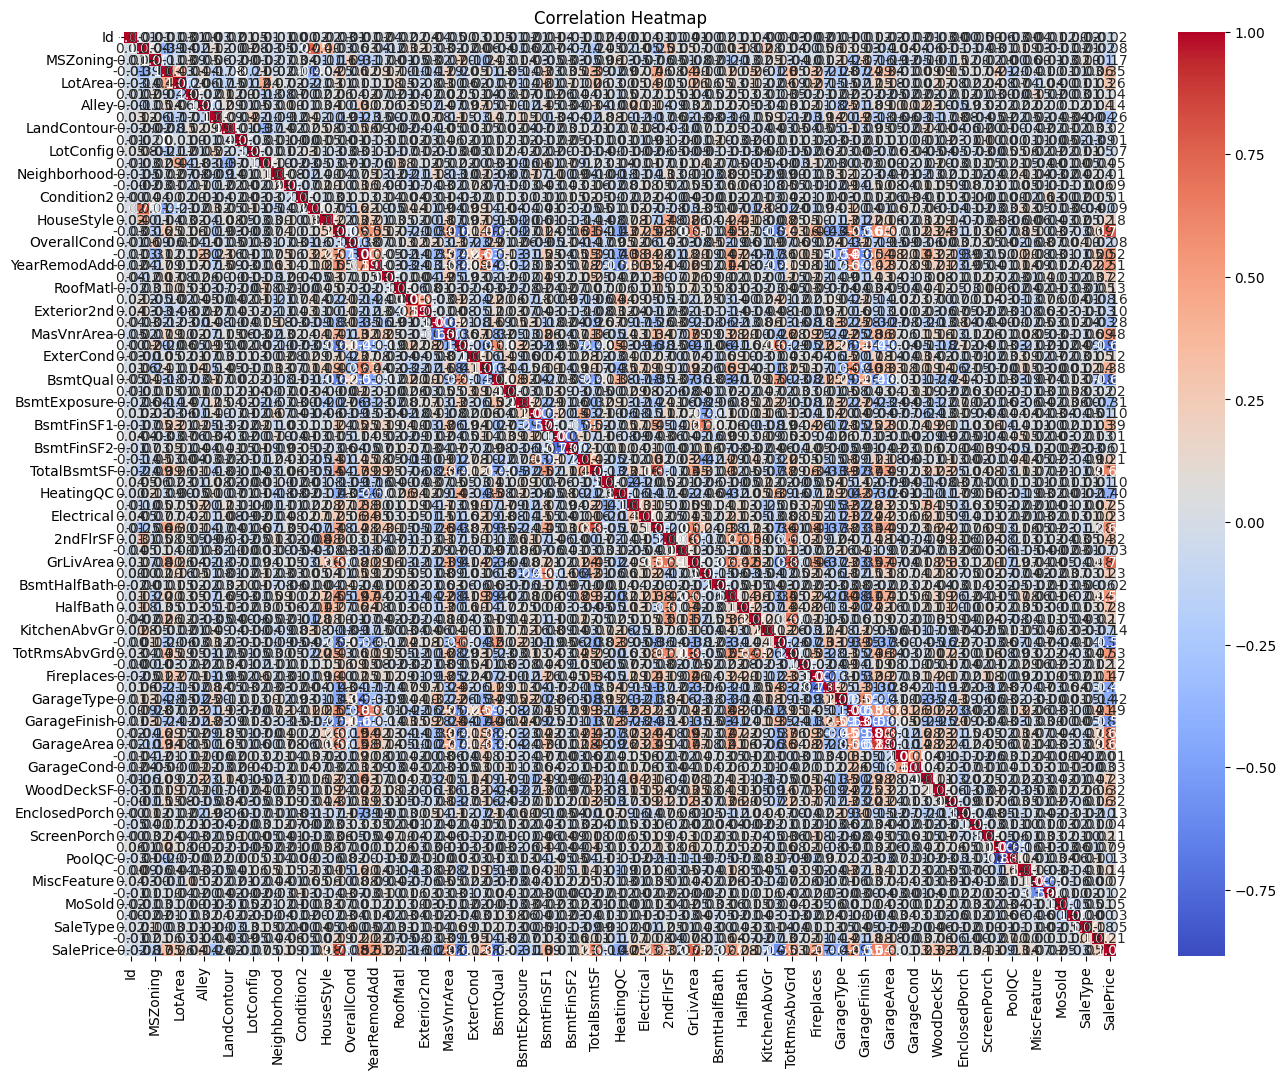

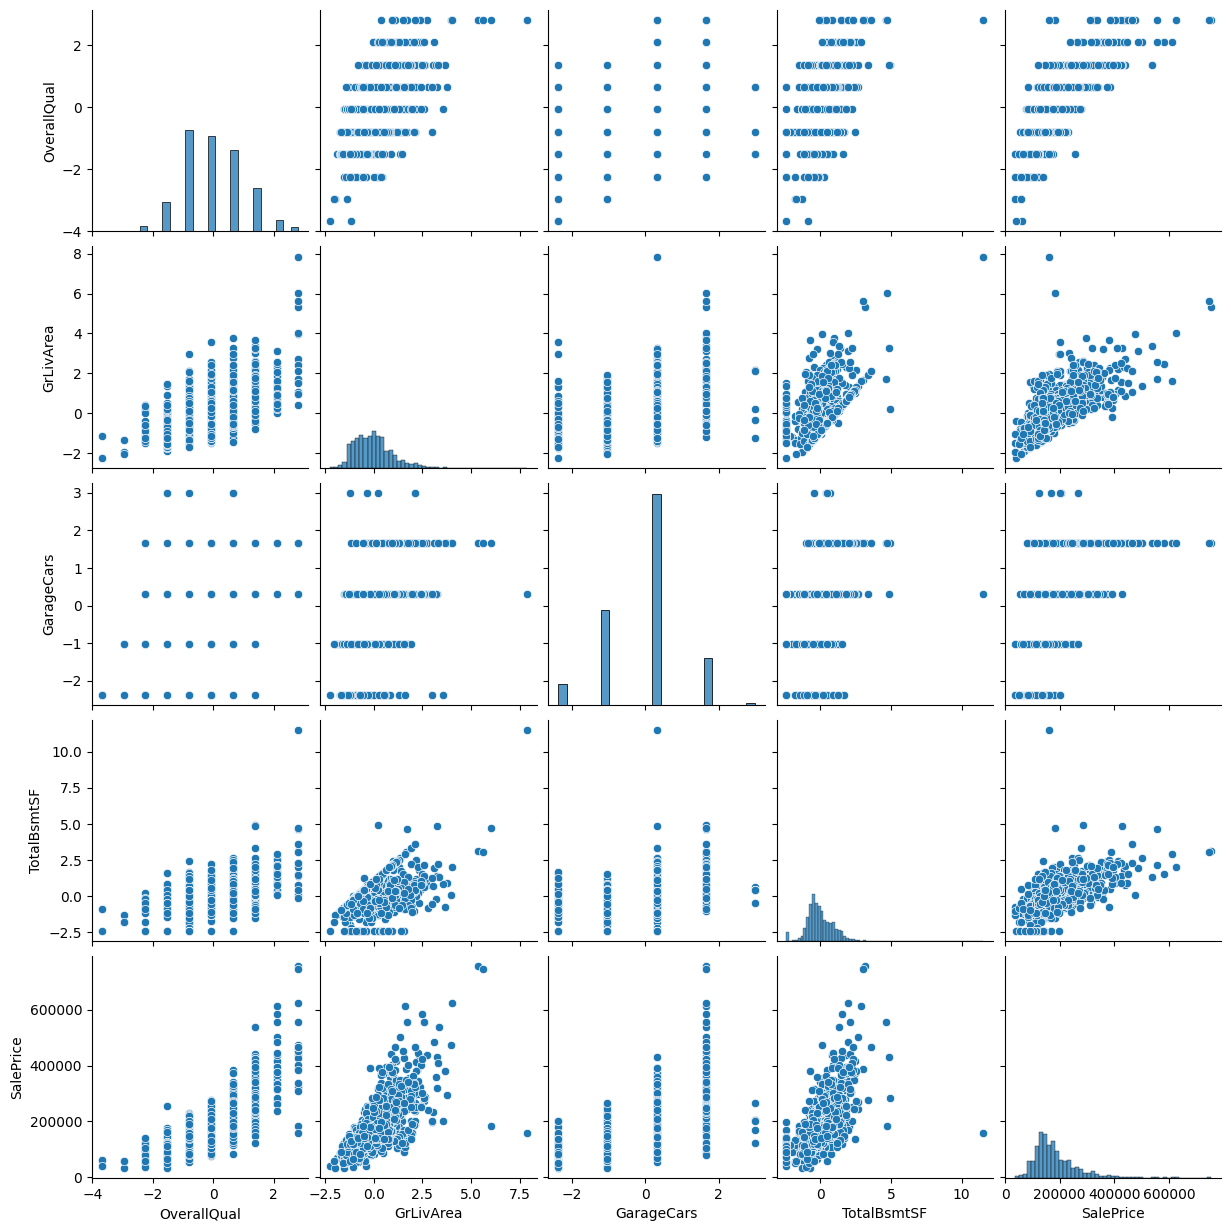

In [26]:
# Combine train_x and train_y for visualizations
df = train_x.copy()
df['SalePrice'] = train_y

# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for some selected features and SalePrice
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'SalePrice']
sns.pairplot(df[selected_features])
plt.show()

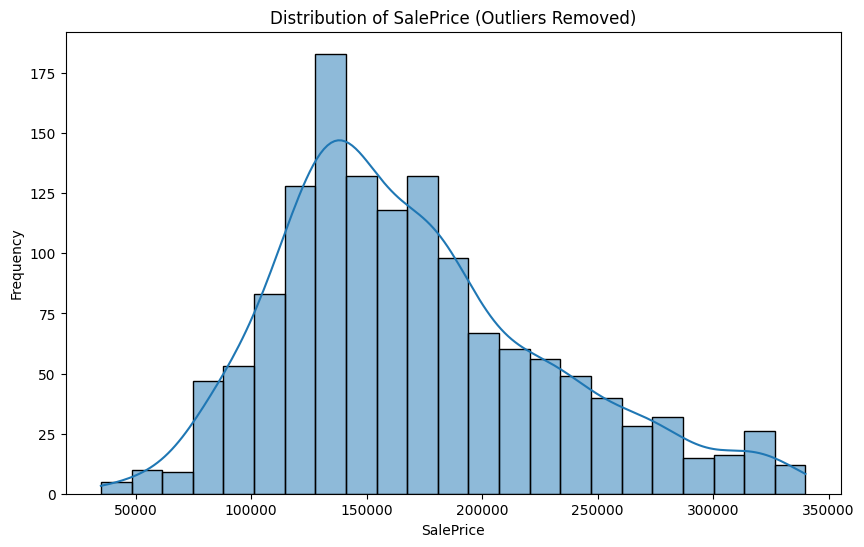

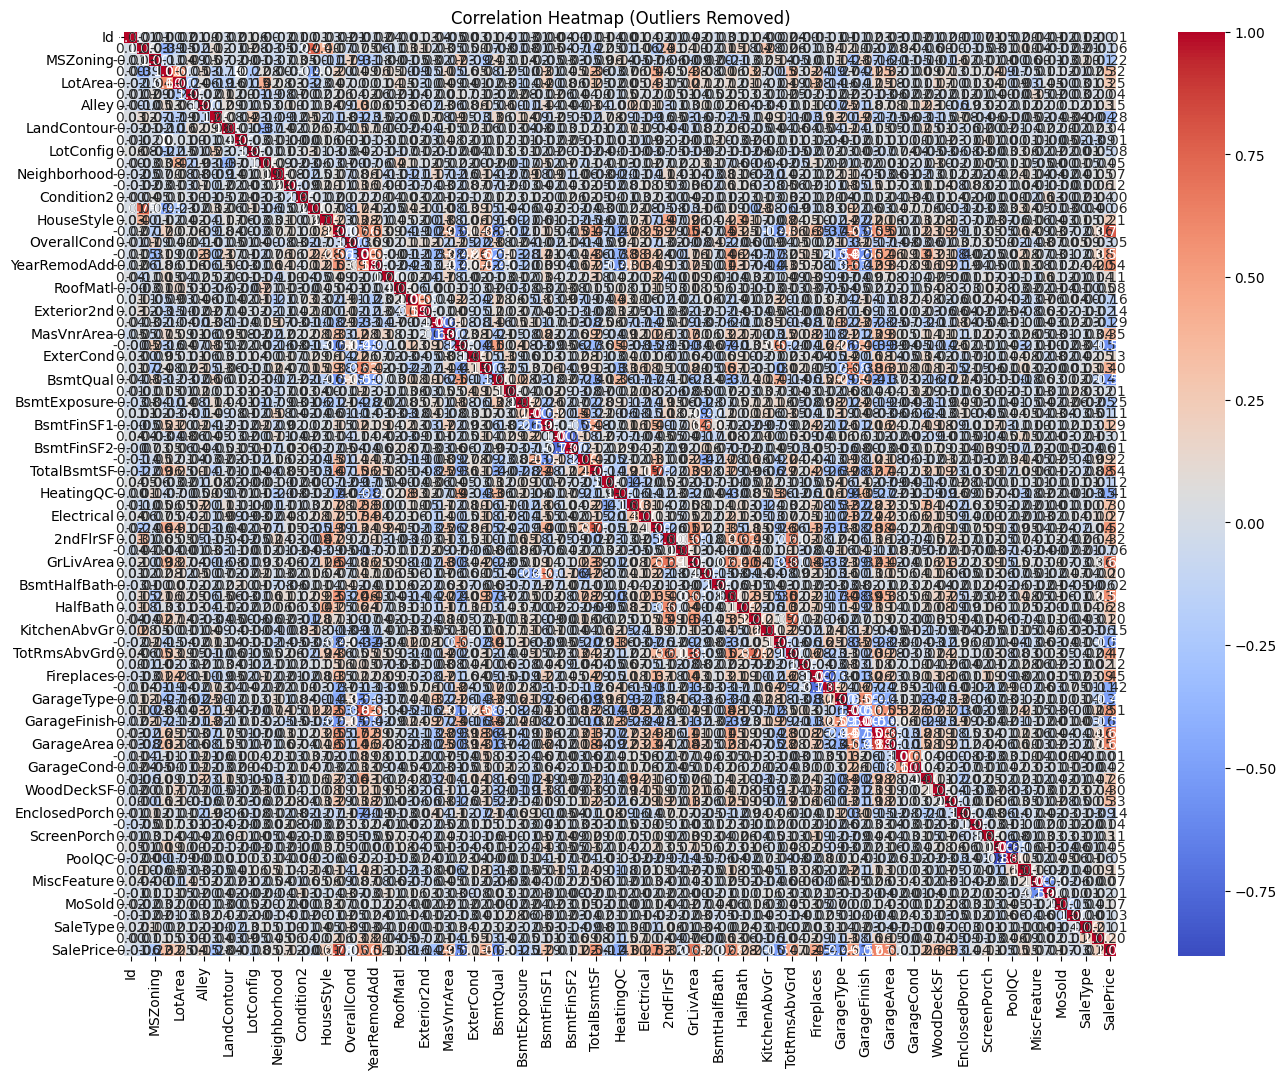

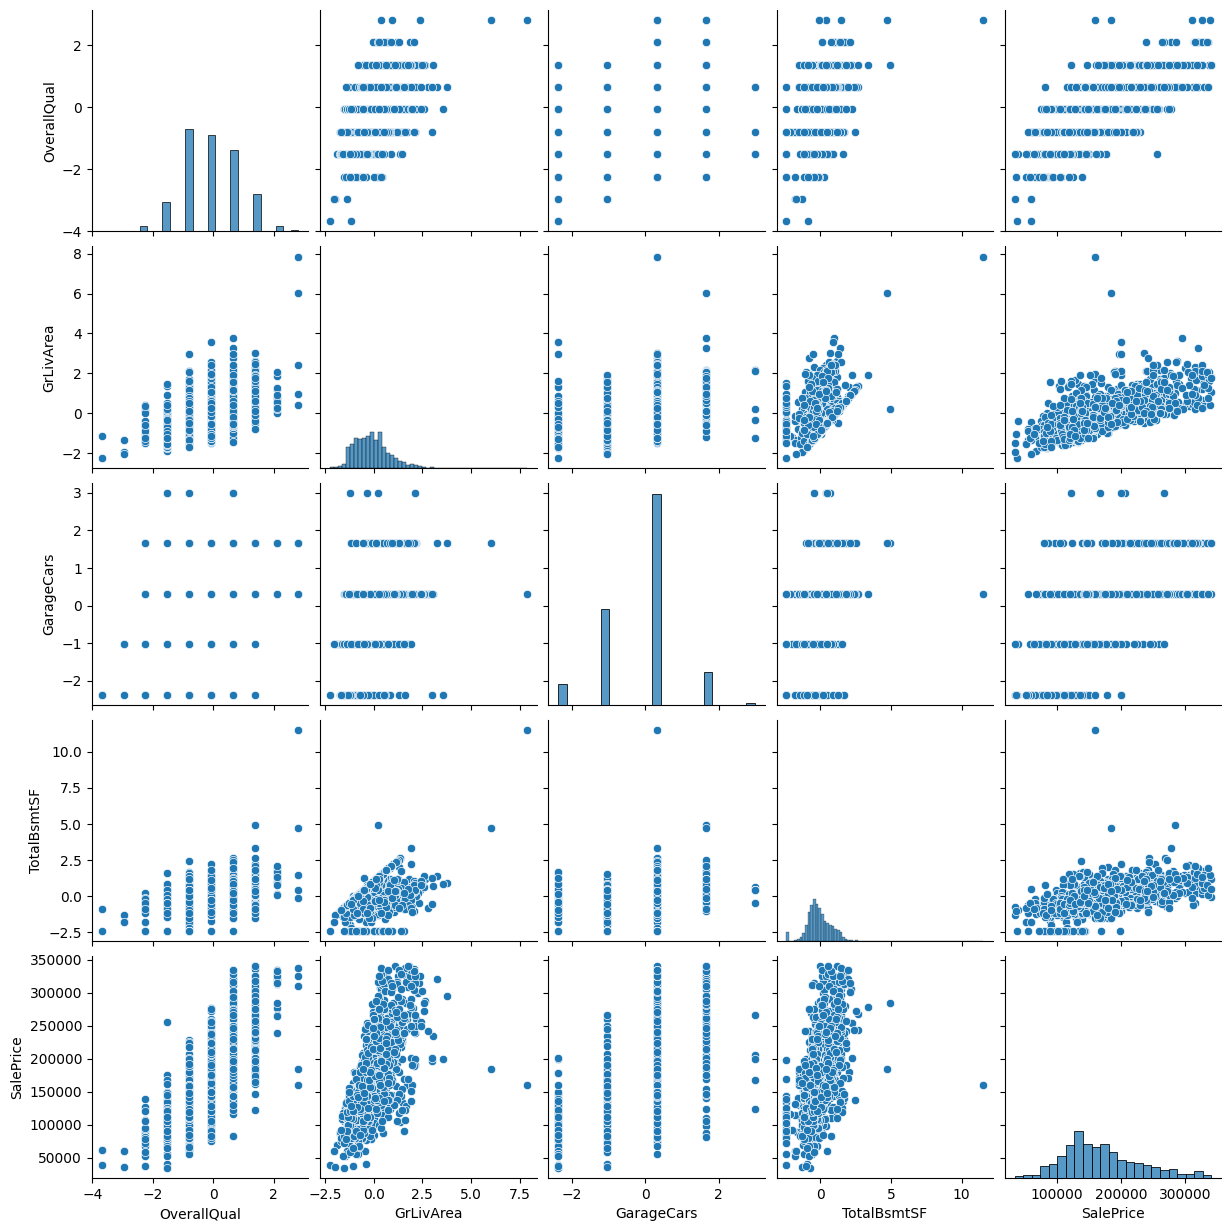

In [27]:
# Calculate Q1 and Q3
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

# Distribution of SalePrice without outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['SalePrice'], kde=True)
plt.title('Distribution of SalePrice (Outliers Removed)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap without outliers
plt.figure(figsize=(16, 12))
correlation_matrix_filtered = df_filtered.corr()
sns.heatmap(correlation_matrix_filtered, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Outliers Removed)')
plt.show()

# Pairplot for selected features and SalePrice without outliers
sns.pairplot(df_filtered[selected_features])
plt.show()


In [30]:
correlation_matrix_filtered.SalePrice.to_csv('correlationmatrix.csv')

In [38]:
# Set a correlation threshold
threshold = 0.3

# Get the correlation matrix
correlation_matrix = df_filtered.corr()

# Select columns with correlation above the threshold (absolute value)
relevant_columns = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > threshold].index

# Print the relevant columns
print("Relevant columns:", relevant_columns)

Relevant columns: Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')


In [39]:
df_filtered_final = df_filtered[relevant_columns]
df_filtered.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0 -1.730865    0.073375         3    -0.208034 -0.207142       1      2   
1 -1.728492   -0.872563         3     0.409895 -0.091886       1      2   
2 -1.726120    0.073375         3    -0.084449  0.073480       1      2   
3 -1.723747    0.309859         3    -0.414011 -0.096897       1      2   
4 -1.721374    0.073375         3     0.574676  0.375148       1      2   

   LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0         3            3          0  ... -0.068692       3      4   
1         3            3          0  ... -0.068692       3      4   
2         0            3          0  ... -0.068692       3      4   
3         0            3          0  ... -0.068692       3      4   
4         0            3          0  ... -0.068692       3      4   

   MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition  \
0            4 -0.087688 -1.599111  0.138777         8              4   
1            4 -0.087688 -0.489110 -0.614439         8              4   
2            4 -0.087688  0.990891  0.138777         8              4   
3            4 -0.087688 -1.599111 -1.367655         8              0   
4            4 -0.087688  2.100892  0.138777         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 81 columns]

In [40]:
df_filtered_final.isnull().sum()

LotFrontage     256
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        7
ExterQual         0
Foundation        0
BsmtQual          0
TotalBsmtSF       0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [41]:
df_filtered_final['LotFrontage']

0      -0.208034
1       0.409895
2      -0.084449
3      -0.414011
4       0.574676
          ...   
1455   -0.331620
1456    0.615871
1457   -0.166839
1458   -0.084449
1459    0.203918
Name: LotFrontage, Length: 1399, dtype: float64

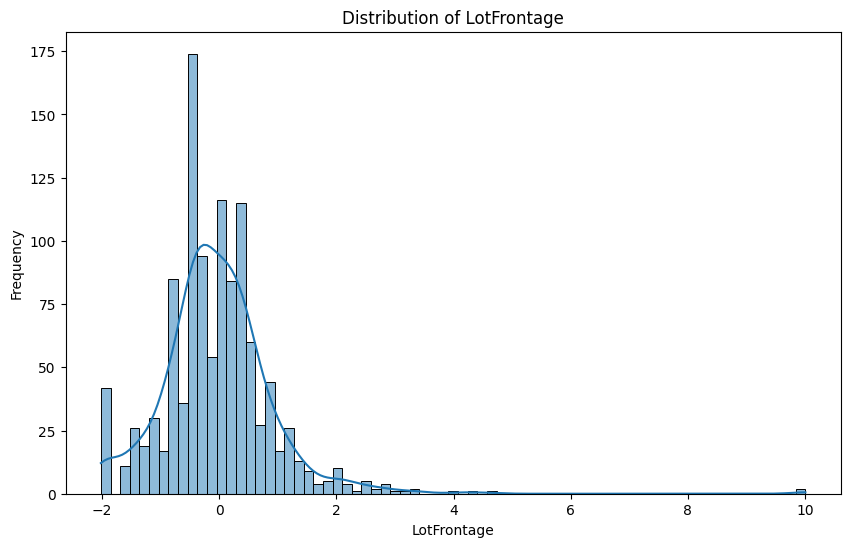

In [43]:
# Distribution of SalePrice without outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_final['LotFrontage'], kde=True)
plt.title('Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

In [44]:
mode_value = df_filtered_final['LotFrontage'].mode()[0]
df_filtered_final['LotFrontage'].fillna(mode_value, inplace=True)

C:\Users\shaik\AppData\Local\Temp\ipykernel_13152\195921706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['LotFrontage'].fillna(mode_value, inplace=True)


In [45]:
df_filtered_final.isnull().sum()

LotFrontage      0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       7
ExterQual        0
Foundation       0
BsmtQual         0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt     81
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
SalePrice        0
dtype: int64

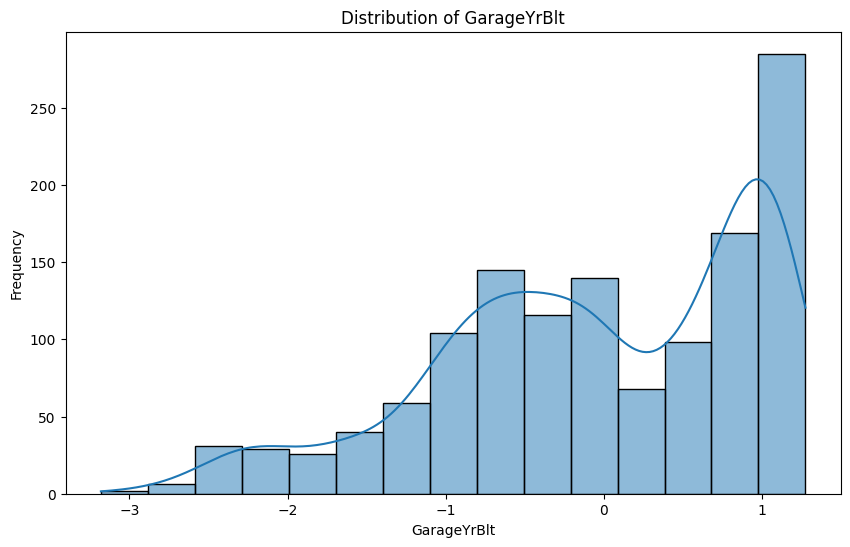

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_final['GarageYrBlt'], kde=True)
plt.title('Distribution of GarageYrBlt')
plt.xlabel('GarageYrBlt')
plt.ylabel('Frequency')
plt.show()

In [48]:
mean_value = df_filtered_final['GarageYrBlt'].mean()
df_filtered_final['GarageYrBlt'].fillna(mean_value, inplace=True)
df_filtered_final.isnull().sum()

C:\Users\shaik\AppData\Local\Temp\ipykernel_13152\3961528240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['GarageYrBlt'].fillna(mean_value, inplace=True)


LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      7
ExterQual       0
Foundation      0
BsmtQual        0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
dtype: int64

In [50]:
df_filtered_final.to_csv('final_training_data.csv')